In [1]:
from pybaseball import team_pitching
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#collect team pitching data from pybaseball
pitching_data = team_pitching(1900,2017)

In [3]:
#a quick look at the data
# print("data shape: {}").format(pitching_data.shape)

print(pitching_data.head())

   Season       Team      W     L    SV      G     GS      IP     SO   K/9  \
1  1907.0       Cubs  107.0  44.0   8.0  200.0  155.0  1373.1  586.0  3.84   
2  1909.0       Cubs  104.0  49.0  11.0  212.0  155.0  1409.1  680.0  4.34   
3  1906.0       Cubs  115.0  36.0  10.0  187.0  154.0  1388.1  702.0  4.55   
4  1910.0  Athletics  102.0  48.0   5.0  200.0  155.0  1421.2  789.0  4.99   
5  1909.0  Athletics   95.0  58.0   3.0  214.0  153.0  1378.0  728.0  4.75   

   BB/9  HR/9  BABIP   LOB%  GB%  HR/FB   ERA   FIP  xFIP   WAR  
1  2.63  0.07  0.241  0.747  NaN    NaN  1.73  2.31   NaN  17.8  
2  2.32  0.04  0.248  0.745  NaN    NaN  1.74  2.08   NaN  22.4  
3  2.89  0.08  0.238  0.757  NaN    NaN  1.75  2.43   NaN  17.6  
4  2.85  0.05  0.254  0.731  NaN    NaN  1.79  2.23   NaN  16.4  
5  2.52  0.06  0.251  0.737  NaN    NaN  1.93  2.08   NaN  15.1  


In [4]:
# some summary stats
pitching_data.describe()

,Season,W,L,SV,G,GS,IP,SO,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR
count,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,480.000000,480.000000,2490.000000,2490.000000,480.000000,2490.000000
mean,1966.900402,78.169880,78.169880,27.439357,417.861446,157.000803,1402.746627,807.410442,5.143590,3.237442,0.732116,0.283121,0.703467,0.441956,0.107942,3.867811,3.855205,4.199833,13.851406
std,34.168275,13.519968,13.454701,14.746081,146.762714,8.955674,82.187613,266.700414,1.576836,0.529707,0.334398,0.015101,0.034719,0.022119,0.016392,0.698867,0.620525,0.353884,4.656199
min,1900.000000,36.000000,36.000000,0.000000,146.000000,103.000000,922.100000,245.000000,1.850000,1.490000,0.030000,0.238000,0.564000,0.382000,0.069000,1.730000,1.920000,3.330000,-1.400000
25%,1938.000000,69.000000,69.000000,14.000000,296.000000,154.000000,1378.100000,574.000000,3.790000,2.902500,0.510000,0.273000,0.685000,0.426000,0.096000,3.420000,3.500000,3.947500,10.700000
50%,1973.000000,79.000000,78.000000,29.000000,399.000000,161.000000,1430.600000,817.000000,5.190000,3.220000,0.770000,0.283000,0.709000,0.441000,0.105000,3.870000,3.905000,4.210000,13.900000
75%,1997.000000,88.000000,88.000000,39.750000,545.000000,162.000000,1449.800000,1006.750000,6.310000,3.570000,0.990000,0.294000,0.728000,0.457000,0.119000,4.327500,4.270000,4.440000,16.900000
max,2017.000000,116.000000,120.000000,68.000000,768.000000,165.000000,1506.200000,1614.000000,10.080000,5.520000,1.610000,0.340000,0.795000,0.525000,0.168000,6.710000,5.830000,5.130000,31.700000


In [5]:
# get league-average SO/game by year
lgAvgK = pitching_data.groupby('Season', as_index=False)['K/9'].mean()
lgAvgBB = pitching_data.groupby('Season', as_index=False)['BB/9'].mean()
lgAvgHR = pitching_data.groupby('Season', as_index=False)['HR/9'].mean()
lgAvgBABIP = pitching_data.groupby('Season', as_index=False)['BABIP'].mean()
lgAvgERA = pitching_data.groupby('Season', as_index=False)['ERA'].mean()
lgAvgHRFB = pitching_data.groupby('Season', as_index=False)['HR/FB'].mean()
lgAvgFIP = pitching_data.groupby('Season', as_index=False)['FIP'].mean()
lgAvgxFIP = pitching_data.groupby('Season', as_index=False)['xFIP'].mean()
lgAvgWAR = pitching_data.groupby('Season', as_index=False)['WAR'].mean()

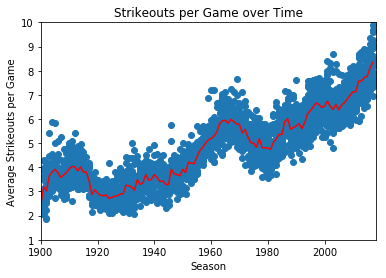

In [6]:
# plot avg. SO/game over time
plt.scatter(pitching_data['Season'], pitching_data['K/9'])
plt.plot(lgAvgK['Season'], lgAvgK['K/9'], c='red')
plt.xlim(1900,2018)
plt.ylim(1,10)
plt.xlabel('Season')
plt.ylabel('Average Strikeouts per Game')
plt.title('Strikeouts per Game over Time');

# We see there's an increase in strikeouts over time. Does this mean that pitchers are improving overall or just at
# striking batters out? This trend may also impact other pitching stats including walks, era, babip, and home runs. 

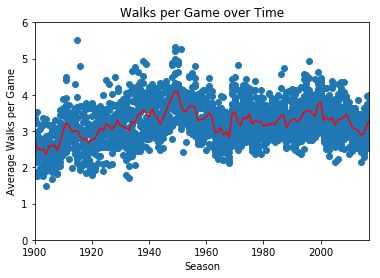

In [7]:
# plot avg. BB/game over time
plt.scatter(pitching_data['Season'], pitching_data['BB/9'])
plt.plot(lgAvgBB['Season'], lgAvgBB['BB/9'], c='red')
plt.xlim(1900,2017)
plt.ylim(0,6,0.5)
plt.xlabel('Season')
plt.ylabel('Average Walks per Game')
plt.title('Walks per Game over Time');

# There has been no noticable change in walks over time, which is interesting. I thought that because pitchers are
# striking more batters out, they might be throwing more borederline pitches, and causing an increase in walks.
# However, we see that is not the case, so pitchers may be throwing similarly located pitches that are harder to hit.

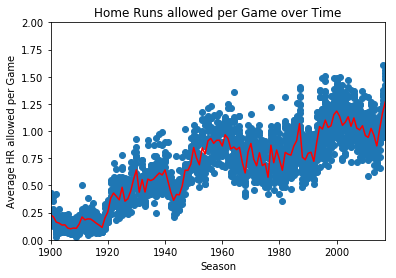

In [8]:
# plot avg. HR/game over time
plt.scatter(pitching_data['Season'], pitching_data['HR/9'])
plt.plot(lgAvgHR['Season'], lgAvgHR['HR/9'], c='red')
plt.xlim(1900,2017)
plt.ylim(0,2)
plt.xlabel('Season')
plt.ylabel('Average HR allowed per Game')
plt.title('Home Runs allowed per Game over Time');

# Home runs are at an all time high, and this definitely shows a direct relationship with strikeouts. While the common
# thought might be that with more strikeouts there will be less hits in general, let alone hard hits, but we actually
# see that as strikeouts have increased over time, so have home runs. This relationship may be explained by looking into  
# other statcast data (launch angle, exit velo, spin rate, pitch location, etc), along with understanding today's hitters'
# philosophy. Today, hitters are trying to hit home runs, and don't care what type of out they make (every out is weighted
# equally).

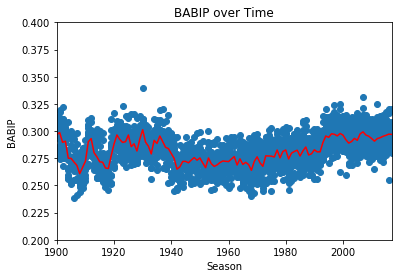

In [9]:
# plot avg. BABIP/game over time
plt.scatter(pitching_data['Season'], pitching_data['BABIP'])
plt.plot(lgAvgHR['Season'], lgAvgBABIP['BABIP'], c='red')
plt.xlim(1900,2017)
plt.ylim(.2,.4, .05)
plt.xlabel('Season')
plt.ylabel('BABIP')
plt.title('BABIP over Time');

# With more strikeouts over time, I hypothesize that batting average on balls in play would go up, because players
# would be making less contact, but batting averages have remained mostly constant over time. Therefore, batters should
# be making less outs on batted balls, and BABIP would increase. However, we don't see that, and BABIP looks like it
# peaked in the early 20th century. While there has been some gradual increase from the middle of the century until now,
# it hasn't been as robust of a trend as the other metrics.

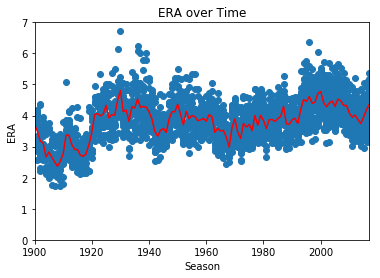

In [10]:
# plot avg. ERA/game over time
plt.scatter(pitching_data['Season'], pitching_data['ERA'])
plt.plot(lgAvgERA['Season'], lgAvgERA['ERA'], c='red')
plt.xlim(1900,2017)
plt.ylim(0,7)
plt.xlabel('Season')
plt.ylabel('ERA')
plt.title('ERA over Time');

# With more strikeouts and more 'unhittable' pitches, I hypothesize that ERA will decrease over time. However, we don't
# see this trend, which caught me by surprise. We see a gradual increase since the mid 20th century, and this could
# be attributed to PED use in the late 20th century. We also see a dip in the early 2000s, when pitching became much more
# dominant in the aftermath of the 'steroid era'

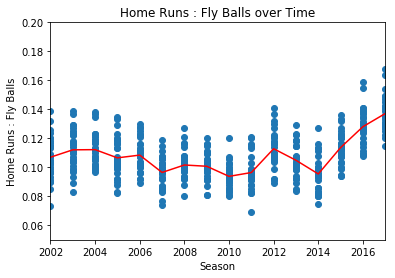

In [11]:
# plot avg. HR/FB over time
plt.scatter(pitching_data['Season'], pitching_data['HR/FB'])
plt.plot(lgAvgHRFB['Season'], lgAvgHRFB['HR/FB'], c='red')
plt.xlim(2002,2017)
plt.ylim(0.05,0.2)
plt.xlabel('Season')
plt.ylabel('Home Runs : Fly Balls')
plt.title('Home Runs : Fly Balls over Time');

# There aren't many years to look at this trend, but we definitely see an increase in the home run / fly ball rate since
# the start of the 21st century. This may be caused by the increased influence of launch angle and various Statcast
# metrics. With players attempting to hit more fly balls, more of them have been resulting in home runs. 

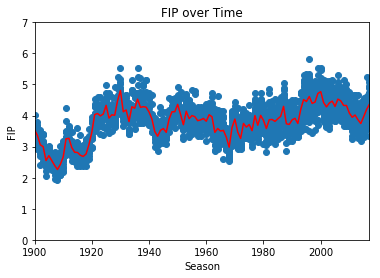

In [12]:
# plot avg. FIP over time
plt.scatter(pitching_data['Season'], pitching_data['FIP'])
plt.plot(lgAvgFIP['Season'], lgAvgFIP['FIP'], c='red')
plt.xlim(1900,2017)
plt.ylim(0,7)
plt.xlabel('Season')
plt.ylabel('FIP')
plt.title('FIP over Time');

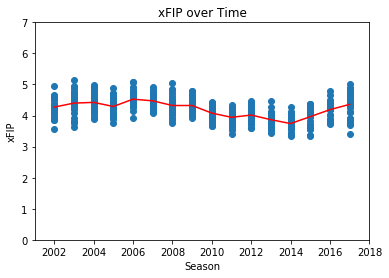

In [13]:
# plot avg. xFIP over time
plt.scatter(pitching_data['Season'], pitching_data['xFIP'])
plt.plot(lgAvgxFIP['Season'], lgAvgxFIP['xFIP'], c='red')
plt.xlim(2001,2018)
plt.ylim(0,7)
plt.xlabel('Season')
plt.ylabel('xFIP')
plt.title('xFIP over Time');